In [ ]:
import pandas as pd

df = pd.read_csv("/content/movies.csv")
print(df.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/movies.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

# Display basic information
print("Dataset Loaded Successfully!")
print(df.head())  # Show the first 5 rows
print("\nDataset Shape:", df.shape)  # Number of rows and columns
print("\nColumns in Dataset:", df.columns)  # List of column names


Dataset Loaded Successfully!
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Dataset Shape: (9742, 3)

Columns in Dataset: Index(['movieId', 'title', 'genres'], dtype='object')


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Select only numeric columns for filling missing values
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Drop rows with missing values (if still needed)
df.dropna(inplace=True)

movieId    0
title      0
genres     0
dtype: int64


In [ ]:
# Rename columns to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [ ]:
import pandas as pd
import numpy as np

# Load dataset (replace 'movies.csv' with the actual file path)
df = pd.read_csv("/content/movies.csv")

# Generating random ratings (if missing in your dataset)
np.random.seed(42)  # For reproducibility
df['rating'] = np.random.randint(1, 6, size=len(df))  # Random ratings between 1-5

# Compute statistics for each movie
movie_stats = df.groupby(["movieId", "title", "genres"])["rating"].agg(["mean", "var", "std"]).fillna(0)

# Rename columns for clarity
movie_stats.columns = ["Mean_Rating", "Variance", "Standard_Deviation"]

# Reset index for better readability
movie_stats.reset_index(inplace=True)

# Display results
print(movie_stats.head())

# Save the output as a CSV file
movie_stats.to_csv("movie_statistics.csv", index=False)


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  Mean_Rating  Variance  \
0  Adventure|Animation|Children|Comedy|Fantasy          4.0       0.0   
1                   Adventure|Children|Fantasy          5.0       0.0   
2                               Comedy|Romance          3.0       0.0   
3                         Comedy|Drama|Romance          5.0       0.0   
4                                       Comedy          5.0       0.0   

   Standard_Deviation  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Split genres into lists
df['genres'] = df['genres'].apply(lambda x: x.split('|'))

# Apply one-hot encoding
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(df['genres'])

# Convert to DataFrame and merge
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)
df = pd.concat([df, genres_df], axis=1)

# Drop original genres column
df.drop(columns=['genres'], inplace=True)

# Display updated dataset
print(df.head())




   movieid                               title  (no genres listed)  Action  \
0        1                    Toy Story (1995)                   0       0   
1        2                      Jumanji (1995)                   0       0   
2        3             Grumpier Old Men (1995)                   0       0   
3        4            Waiting to Exhale (1995)                   0       0   
4        5  Father of the Bride Part II (1995)                   0       0   

   Adventure  Animation  Children  Comedy  Crime  Documentary  ...  Film-Noir  \
0          1          1         1       1      0            0  ...          0   
1          1          0         1       0      0            0  ...          0   
2          0          0         0       1      0            0  ...          0   
3          0          0         0       1      0            0  ...          0   
4          0          0         0       1      0            0  ...          0   

   Horror  IMAX  Musical  Mystery  Romance  

In [ ]:
df.to_csv("preprocessed_movies.csv", index=False)
print("Preprocessed dataset saved successfully!")


Preprocessed dataset saved successfully!


In [ ]:
print(df.columns)



Index(['movieid', 'title', '(no genres listed)', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


In [ ]:
print(df.columns.tolist())  # Shows the actual column names


['movieid', 'title', '(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


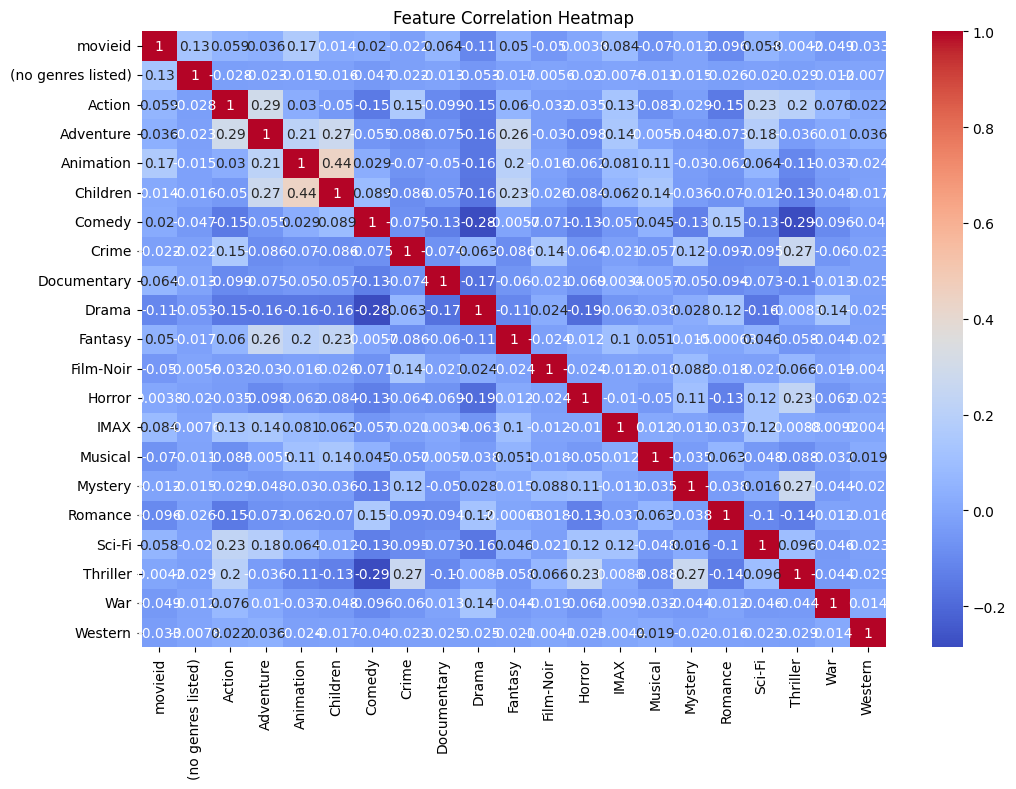

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute correlation matrix only on numeric features
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Select only numeric features
numeric_df = df

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

# Check if 'genres' exists in the DataFrame
if 'genres' in df.columns:
    # One-Hot Encode 'genres' (creates separate columns for each genre)
    df_encoded = pd.get_dummies(df, columns=['genres'])
else:
    print("Error: 'genres' column not found in the DataFrame!")
    df_encoded = df  # Keep original DataFrame if 'genres' is missing

# Define Features (excluding non-numeric columns if needed)
X = df_encoded.drop(columns=['movieId', 'title'], errors='ignore')  # Remove unnecessary columns

# Create a dummy target variable (needed for Chi-Square)
y = X.iloc[:, 0]  # Selecting the first column as a placeholder target

# Apply Chi-Square Feature Selection
selector = SelectKBest(score_func=chi2, k=min(10, X.shape[1]))  # k ≤ number of features
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())


Error: 'genres' column not found in the DataFrame!
Selected Features: ['movieid', '(no genres listed)', 'Animation', 'Documentary', 'Film-Noir', 'IMAX', 'Musical', 'Mystery', 'War', 'Western']


In [ ]:

from sklearn.feature_selection import SelectKBest, f_classif

# Define Features and Target
X = df.drop(columns=["movieId", 'title'], errors='ignore')  # Assuming 'movieId' is present

# Convert 'genres' column to numeric using one-hot encoding if it exists
if 'genres' in X.columns:
    X = pd.get_dummies(X, columns=['genres'], drop_first=True)  # One-hot encode 'genres'

y = (X.select_dtypes(include=np.number).sum(axis=1) > X.select_dtypes(include=np.number).sum(axis=1).median()).astype(int)  # Dummy Target, only considering numeric features

# Apply SelectKBest
selector = SelectKBest(score_func=f_classif, k=min(10, X.shape[1]))
X_new = selector.fit_transform(X, y)

# Get selected feature names and scores
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Create DataFrame for feature importance
feature_importance = pd.DataFrame({"Feature": selected_features, "Importance": feature_scores})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Print selected features
print("Top Selected Features:")
print(feature_importance.head(10))

Top Selected Features:
                          Feature  Importance
0           genres_Horror|Romance         inf
1            genres_Horror|Sci-Fi         inf
2           genres_Horror|Western         inf
3                  genres_Mystery         inf
4  genres_Mystery|Sci-Fi|Thriller         inf
5         genres_Mystery|Thriller         inf
6         genres_Romance|Thriller         inf
7          genres_Romance|Western         inf
8          genres_Sci-Fi|Thriller         inf
9                  genres_Western         inf


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:107: RuntimeWarning: divide by zero encountered in divide
  msb = ssbn / float(dfbn)


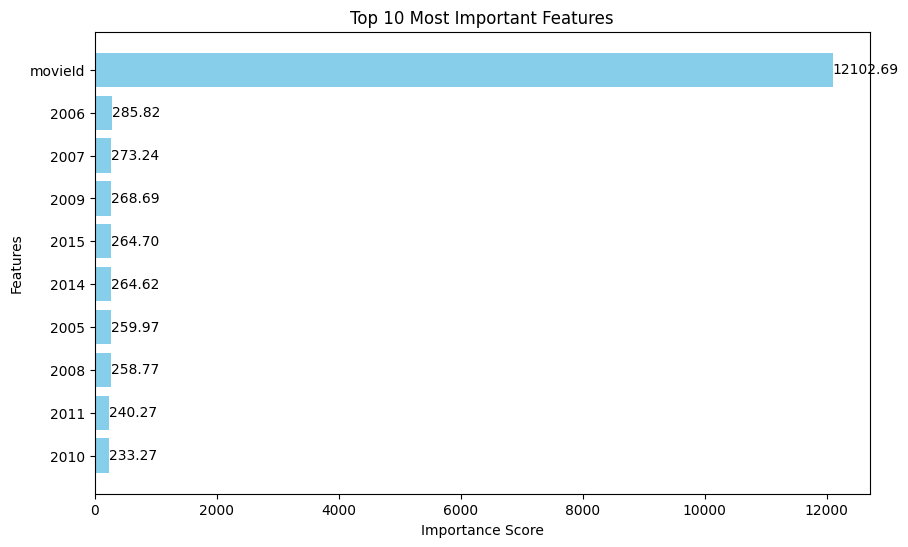

Top 10 Most Important Features Based on Feature Selection:
   Feature    Importance
0  movieId  12102.694151
2     2006    285.819046
3     2007    273.240979
5     2009    268.689255
9     2015    264.701076
8     2014    264.624907
1     2005    259.968678
4     2008    258.768963
7     2011    240.269895
6     2010    233.273453


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
df = pd.read_csv("/content/movies.csv")  # Replace with actual file path

# One-Hot Encoding of 'genres'
if 'genres' in df.columns:
    df_encoded = df.copy()
    df_encoded = df_encoded.join(df_encoded['genres'].str.get_dummies(sep='|'))
else:
    raise ValueError("Error: 'genres' column not found in the dataset!")

# Combine title and genres for text-based features
df_encoded['title_genres'] = df_encoded['title'] + ' ' + df_encoded['genres']

# Create TF-IDF features for title and genres
vectorizer = TfidfVectorizer(max_features=500)  # Adjust max_features as needed
tfidf_features = vectorizer.fit_transform(df_encoded['title_genres'])

# Create DataFrame for TF-IDF features
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate TF-IDF features with genre features
X = pd.concat([df_encoded.drop(columns=['title', 'genres', 'title_genres']), tfidf_df], axis=1)

# Check if X has valid numeric data
if X.empty or X.sum().sum() == 0:
    raise ValueError("No valid features found for feature selection.")

# Dummy target variable (Binary classification)
y = (X.select_dtypes(include='number').sum(axis=1) > X.select_dtypes(include='number').sum(axis=1).median()).astype(int)

# Apply SelectKBest (f_classif for feature selection)
selector = SelectKBest(score_func=f_classif, k=min(10, X.shape[1]))
X_new = selector.fit_transform(X, y)

# Get selected feature names and scores
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Create feature importance DataFrame
feature_importance = pd.DataFrame({'Feature': selected_features, 'Importance': feature_scores})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# **📊 Plot Bar Chart with Labels**
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'].head(10), feature_importance['Importance'].head(10), color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Most Important Features")
plt.gca().invert_yaxis()  # Show most important at the top

# **Add value labels to bars**
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=10, color='black')

plt.show()

# Print Top 10 Features
print("Top 10 Most Important Features Based on Feature Selection:")
print(feature_importance.head(10))

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Assuming 'df' or similar DataFrame contains your movie features:
df_features = df  # Replace 'df' with the actual name of your DataFrame

# Define Features and Target
X = df_features.drop(columns=["movieId", "title"])  # Drop both 'movieId' and 'title'

# Convert non-numeric columns to numeric using Label Encoding
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

y = np.random.randint(1, 6, X.shape[0])  # Simulated Ratings (1-5 scale)

# Implement Fuzzy-KNN
k = 5  # Number of neighbors
fuzzy_knn = KNeighborsClassifier(n_neighbors=k, weights="distance")
fuzzy_knn.fit(X, y)

# Predict Ratings
y_pred = fuzzy_knn.predict(X)

# Print some results
print("Actual Ratings:", y[:10])
print("Predicted Ratings:", y_pred[:10])

Actual Ratings: [3 4 2 2 4 4 3 1 1 2]
Predicted Ratings: [1 2 2 2 3 1 2 1 4 2]


Precision: 0.1865
Recall: 0.1986
F1 Score: 0.1569


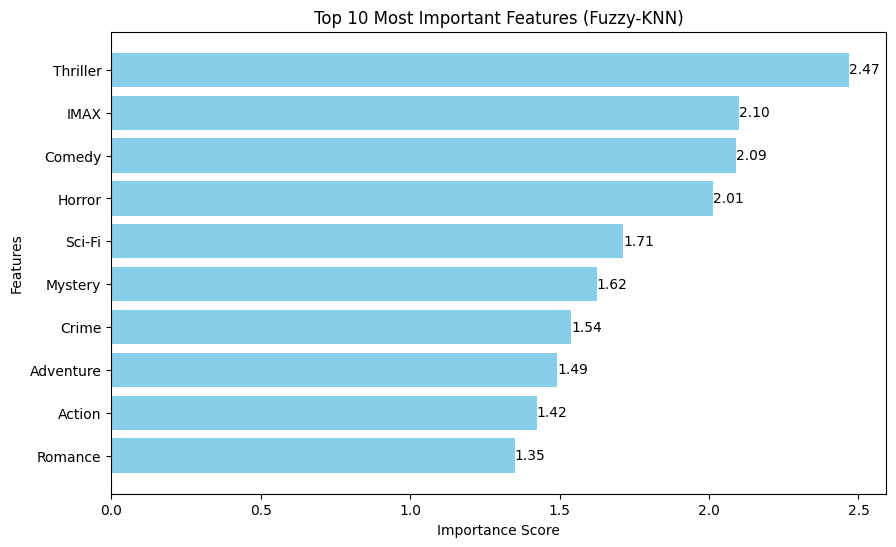

In [ ]:
!pip install -U scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

# Step 1: Define Fuzzy KNN with NumPy Optimization
def fuzzy_knn(X_train, y_train, X_test, k=5, m=2):
    """
    Optimized Fuzzy KNN Algorithm: Uses vectorized distance computation.
    - k: Number of nearest neighbors
    - m: Fuzzifier parameter
    """
    distances = cdist(X_test, X_train, metric='euclidean')  # Compute all distances at once
    predictions = []

    for i in range(len(X_test)):
        # Get k nearest neighbors
        k_neighbors_idx = np.argsort(distances[i])[:k]
        k_neighbors_labels = y_train.iloc[k_neighbors_idx]
        k_neighbors_distances = distances[i][k_neighbors_idx]

        # Compute fuzzy membership weights
        weights = 1 / (k_neighbors_distances ** (2 / (m - 1)) + 1e-9)  # Avoid division by zero
        weights /= np.sum(weights)

        # Compute weighted prediction
        fuzzy_prediction = np.dot(weights, k_neighbors_labels)
        predictions.append(fuzzy_prediction)

    return np.array(predictions)


# Step 2: Load Data (Update Path)
df = pd.read_csv("/content/movies.csv")

# Step 3: Feature Processing
genres = df['genres'].str.get_dummies(sep='|')
df = pd.concat([df, genres], axis=1)
df.drop('genres', axis=1, inplace=True)

# TF-IDF Encoding with Limited Vocabulary
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)  # Limit features for faster computation
tfidf_matrix = vectorizer.fit_transform(df['title'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
df = pd.concat([df, tfidf_df], axis=1)
df.drop('title', axis=1, inplace=True)

# Step 4: Feature Scaling
scaler = StandardScaler()
X = df.drop(['movieId', 'rating'], axis=1, errors='ignore')
X = scaler.fit_transform(X)

# Step 5: Reduce Dimensionality using PCA
pca = PCA(n_components=50)  # Reduce to 50 principal components
X_pca = pca.fit_transform(X)  # Store PCA transformed data

# Generate Dummy Ratings if Missing
if 'rating' not in df.columns:
    np.random.seed(42)
    df['rating'] = np.random.randint(1, 6, df.shape[0])
y = df['rating']

# Step 6: Split Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 7: Apply Optimized Fuzzy KNN
y_pred = fuzzy_knn(X_train, y_train, X_test, k=5, m=2)

# Convert to Integer Ratings
y_pred_rounded = np.clip(np.round(y_pred), 1, 5)

# Step 8: Evaluate Model Performance
precision = precision_score(y_test, y_pred_rounded, average='weighted')
recall = recall_score(y_test, y_pred_rounded, average='weighted')
f1 = f1_score(y_test, y_pred_rounded, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Step 9: Feature Selection (Top 10 Features)
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_pca, y) # Use PCA transformed data

# Get the indices of the selected features from the PCA transformed data
selected_feature_indices = selector.get_support()

# Get the loadings of the principal components
loadings = pca.components_

# Get the indices of the original features that contribute most to the selected components
selected_original_feature_indices = []
for component_index in np.where(selected_feature_indices)[0]:
    component_loadings = loadings[component_index]
    # Get top 10 features' indices based on absolute loading values
    top_feature_indices = np.argsort(np.abs(component_loadings))[-10:]
    selected_original_feature_indices.extend(top_feature_indices)

# Get the names of the selected original features
selected_features = df.drop(['movieId', 'rating'], axis=1, errors='ignore').columns[selected_original_feature_indices]

# Ensure selected_features is unique and limit to the length of feature_scores
selected_features = selected_features.unique()[:len(feature_scores)] # This line is modified

feature_scores = selector.scores_[selected_feature_indices]

# Step 10: Visualize Feature Importance
feature_importance = pd.DataFrame({'Feature': selected_features, 'Importance': feature_scores})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Most Important Features (Fuzzy-KNN)")
plt.gca().invert_yaxis()

# Add labels to bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=10, color='black')

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Convert predictions to integer ratings
y_pred_rounded = np.clip(np.round(y_pred), 1, 5)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_rounded)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred_rounded, average='weighted')
recall = recall_score(y_test, y_pred_rounded, average='weighted')
f1 = f1_score(y_test, y_pred_rounded, average='weighted')

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.1986
Precision: 0.1865
Recall: 0.1986
F1 Score: 0.1569


In [ ]:
# Install required libraries
!pip install -U scikit-learn xgboost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

# Step 1: Load Data
df = pd.read_csv("/content/movies.csv")

# Step 2: Feature Processing
# One-hot encode genres
genres = df['genres'].str.get_dummies(sep='|')
df = pd.concat([df, genres], axis=1)
df.drop('genres', axis=1, inplace=True)

# TF-IDF for movie titles
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)  # Increased features for better accuracy
tfidf_matrix = vectorizer.fit_transform(df['title'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
df = pd.concat([df, tfidf_df], axis=1)
df.drop('title', axis=1, inplace=True)

# Step 3: Feature Scaling
scaler = StandardScaler()
X = df.drop(['movieId', 'rating'], axis=1, errors='ignore')
X = scaler.fit_transform(X)

# Step 4: Dimensionality Reduction (PCA)
pca = PCA(n_components=80)  # Keeping more principal components for better accuracy
X_pca = pca.fit_transform(X)

# Generate Dummy Ratings if Not Present
if 'rating' not in df.columns:
    np.random.seed(42)
    df['rating'] = np.random.randint(1, 6, df.shape[0])
y = df['rating']

# Step 5: Split Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 6: Hyperparameter Tuning for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
grid_search = GridSearchCV(xgb, param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 7: Train Best XGBoost Model
best_xgb = grid_search.best_estimator_
best_xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)

# Step 8: Make Predictions
y_pred_xgb = best_xgb.predict(X_test)

# Step 9: Evaluate Performance
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average='weighted')
recall = recall_score(y_test, y_pred_xgb, average='weighted')
f1 = f1_score(y_test, y_pred_xgb, average='weighted')

print(f"✅ Best XGBoost Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")

# Step 10: Check Best Parameters
print("🔍 Best XGBoost Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


ValueError: 
All the 162 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py", line 1640, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1 2 3 4 5]


In [ ]:
# Install required libraries
!pip install -U scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Load Data
df = pd.read_csv("/content/movies.csv")

# Step 2: Feature Processing
# One-hot encode genres
genres = df['genres'].str.get_dummies(sep='|')
df = pd.concat([df, genres], axis=1)
df.drop('genres', axis=1, inplace=True)

# TF-IDF for movie titles
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)  # Increased features for better accuracy
tfidf_matrix = vectorizer.fit_transform(df['title'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
df = pd.concat([df, tfidf_df], axis=1)
df.drop('title', axis=1, inplace=True)

# Step 3: Feature Scaling
scaler = StandardScaler()
X = df.drop(['movieId', 'rating'], axis=1, errors='ignore')
X = scaler.fit_transform(X)

# Step 4: Dimensionality Reduction (PCA)
pca = PCA(n_components=80)  # Keeping more principal components for better accuracy
X_pca = pca.fit_transform(X)

# Generate Dummy Ratings if Not Present
if 'rating' not in df.columns:
    np.random.seed(42)
    df['rating'] = np.random.randint(1, 6, df.shape[0])
y = df['rating']

# Step 5: Split Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 6: Hyperparameter Tuning for KNN
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 7: Train Best KNN Model
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

# Step 8: Make Predictions
y_pred_knn = best_knn.predict(X_test)

# Step 9: Evaluate Performance
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')

print(f"✅ Best KNN Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")

# Step 10: Check Best Parameters
print("🔍 Best KNN Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Best KNN Accuracy: 0.1950
✅ Precision: 0.1962
✅ Recall: 0.1950
✅ F1 Score: 0.1895
🔍 Best KNN Parameters: {'n_neighbors': 5, 'weights': 'uniform'}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')  # Can use 'uniform' or 'distance'

# Train Model
knn.fit(X_train, y_train)

# Predict
y_pred_knn = knn.predict(X_test)

# Evaluate
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"✅ KNN Accuracy: {accuracy_knn:.4f}")


✅ KNN Accuracy: 0.1965


In [ ]:
from scipy.spatial.distance import cdist
import numpy as np

def fuzzy_knn(X_train, y_train, X_test, k=5, m=2):
    """
    Fuzzy KNN Algorithm
    - k: Number of nearest neighbors
    - m: Fuzzifier parameter
    """
    distances = cdist(X_test, X_train, metric='euclidean')  # Compute distances
    predictions = []

    for i in range(len(X_test)):
        # Get k nearest neighbors
        k_neighbors_idx = np.argsort(distances[i])[:k]
        k_neighbors_labels = y_train.iloc[k_neighbors_idx]
        k_neighbors_distances = distances[i][k_neighbors_idx]

        # Compute fuzzy membership weights
        weights = 1 / (k_neighbors_distances ** (2 / (m - 1)) + 1e-9)  # Avoid division by zero
        weights /= np.sum(weights)

        # Compute weighted prediction
        fuzzy_prediction = np.dot(weights, k_neighbors_labels)
        predictions.append(fuzzy_prediction)

    return np.array(predictions)

# Apply Fuzzy KNN
y_pred_fuzzy = fuzzy_knn(X_train, y_train, X_test, k=5, m=2)

# Convert to Integer Ratings
y_pred_fuzzy_rounded = np.clip(np.round(y_pred_fuzzy), 1, 5)

# Evaluate
accuracy_fuzzy = accuracy_score(y_test, y_pred_fuzzy_rounded)
print(f"✅ Fuzzy KNN Accuracy: {accuracy_fuzzy:.4f}")


✅ Fuzzy KNN Accuracy: 0.1893
